<a href="https://colab.research.google.com/github/Jojo18-20/AI_course_submission/blob/main/modul5_assigment3_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Johanna Schaefer -Module 5- Assigment 3

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from sklearn.neighbors import NearestNeighbors
import sklearn.metrics.pairwise as dis_lib


In [2]:
data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")

In [3]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)

# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])

# Define the total number of 5-minute intervals in a day
nintvals = 288

# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)

# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset'
print(vectorized_day_dataset)

/tmp/ipython-input-2050002240.py:22: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(days[i])
/tmp/ipython-input-2050002240.py:27: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(days[i])


[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]


Data exploration

In [4]:
print('number of nans',np.sum(np.isnan(vectorized_day_dataset)))
print('rate of nans',np.sum(np.isnan(vectorized_day_dataset))/(ndays*nintvals))

number of nans 277
rate of nans 0.0026350837138508373


(288,)


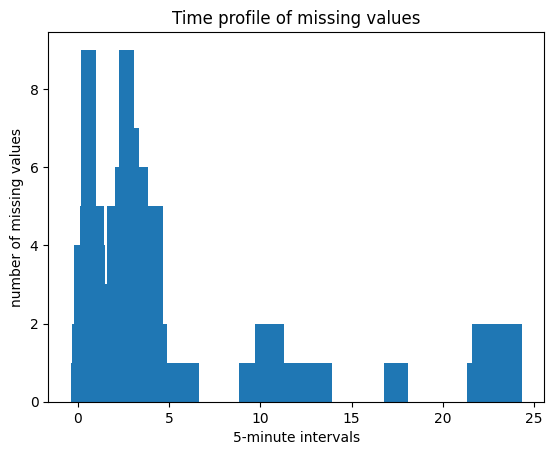

In [5]:
nans_per_time = np.sum(np.isnan(vectorized_day_dataset),0)
print(nans_per_time.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Create an array 'x_axis' representing the 5-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)
# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []
# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)
ax.bar(x_axis_hours,height=nans_per_time)


ax.set_ylabel('number of missing values')
ax.set_xlabel('5-minute intervals')
ax.set_title('Time profile of missing values')

plt.show()

In [6]:
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))

number of days with missing value 28


In [7]:
print(np.where(nans_per_day > 0)[0])
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]

[ 25  49  52  86  87  88 137 138 139 185 187 207 208 209 217 247 248 249
 250 251 266 275 276 277 299 306 311 341]


In [29]:
#X_train, X_test = train_test_split(vectorized_day_dataset_no_nans, test_size=0.2, random_state=42, shuffle=True)
X_train, X_test, days_train_not_nans, days_test_not_nans = train_test_split(
    vectorized_day_dataset_no_nans,
    days_not_nans,
    test_size=0.2,
    random_state=42,
    shuffle=True
)
#nans_per_day_train = np.sum(np.isnan(X_train),1)
#days_train_not_nans = days[np.where(nans_per_day_train == 0)[0]]
#print(days_train_not_nans)
X_train

269


array([[56., 36., 46., ..., 79., 67., 62.],
       [13., 17., 17., ..., 31., 16., 15.],
       [56., 54., 62., ..., 18., 17., 11.],
       ...,
       [49., 22., 32., ..., 70., 75., 67.],
       [26., 12., 25., ..., 47., 40., 38.],
       [30., 50., 39., ..., 26., 22., 31.]])

In [30]:
#nans_per_day_test = np.sum(np.isnan(X_test), 1)
#days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]
#print(nans_per_day_test)
print(days_train_not_nans)



[20211120 20210503 20210530 20210401 20210926 20210305 20210902 20210725
 20210901 20210118 20210125 20211216 20210802 20211127 20210711 20210604
 20210506 20210605 20210527 20210511 20210805 20210324 20210923 20210602
 20211013 20210202 20211211 20211214 20210616 20210917 20210501 20210607
 20210304 20210603 20210116 20210107 20210912 20211024 20210410 20210201
 20210123 20211111 20211121 20210301 20210813 20210111 20210826 20210910
 20210326 20211118 20210210 20210918 20210421 20210617 20210730 20211119
 20210120 20210119 20210513 20210311 20210904 20210701 20210409 20210314
 20210815 20210413 20210414 20210702 20210313 20210124 20210208 20211019
 20210312 20211030 20210606 20210512 20210708 20210403 20211109 20210614
 20211110 20210624 20211008 20210612 20210831 20211212 20210827 20210516
 20210209 20210920 20211213 20210627 20210429 20210828 20210731 20210504
 20211205 20211220 20211129 20210623 20211122 20211020 20210613 20210927
 20210103 20210502 20210706 20210824 20210507 20211

Clustering

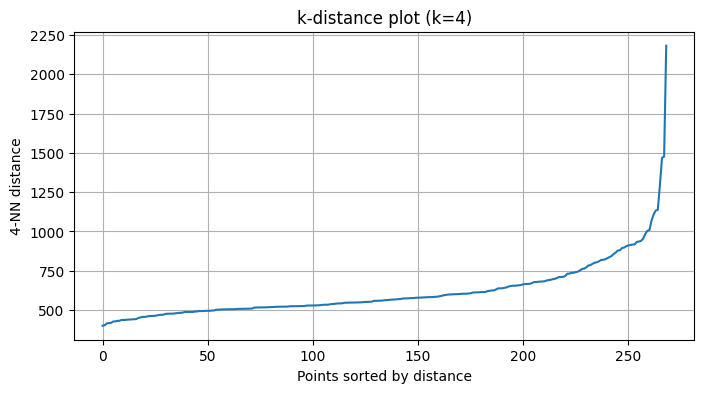

eps candidates (use one near knee): [634.95815532 697.25069788 759.74527291 838.19577559 935.05643724]


In [14]:
min_samples = 5
k = min_samples - 1  # k-th neighbor
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_train)
distances, indices = nbrs.kneighbors(X_train)
k_dist = np.sort(distances[:, k])

# Plot
plt.figure(figsize=(8,4))
plt.plot(k_dist)
plt.ylabel(f"{k}-NN distance")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance plot (k={k})")
plt.grid()
plt.show()

# eps-candidates:
eps_candidates = np.percentile(k_dist, [70, 80, 85, 90, 95])
print("eps candidates (use one near knee):", eps_candidates)


In [25]:
from dateutil.relativedelta import relativedelta
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib import colors
import datetime


def assign_colors(n_clusters, days, assigments):

    days_colors = []
    color_to_cluster = []
    style_to_cluster = []
    weekend_colors = ['#67001f','#d6604d','#fdae61','#f46d43','#d53e4f','#9e0142','#f768a1','#f1c232']#,'#fe9929','#cc4c02','#e31a1c','#737373','#bdbdbd','#252525','#bcbddc']
#    weekend_school_colors = ['#c2a5cf','#f1b6da','#8e0152','#c51b7d','#de77ae','#ae017e','#fcc5c0','#e31a1c','#737373','#bdbdbd']
#    bank_holidays_colors = ['#543005','#dfc27d','#bf812d','#8c510a']
    mixed_colors = ['#4d4d4d','#35978f','#bababa','#878787']
    weekday_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#cab2d6','#6a3d9a','#b15928','#8dd3c7','#bebada','#fb8072','#b3de69','#bc80bd','#fccde5','#ccebc5','#35978f','#80cdc1']

    cluster_id_weekdays_share = []
    cluster_id_weekend_share = []
    cluster_id_all_days = []

    for i in range(0,n_clusters):
        color_to_cluster.append(None)
        style_to_cluster.append(None)
        cluster_id_weekdays_share.append(0)
        cluster_id_weekend_share.append(0)
        cluster_id_all_days.append(0)

    for i in range(0,len(days)):
        #print(i,assigments[i],len(assigments),len(cluster_id_all_days))
        if assigments[i] is not None:
            cluster_id_all_days[assigments[i]] += 1
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')

            if int(pomT.weekday()) < 5:
                cluster_id_weekdays_share[assigments[i]] += 1
            else:
                cluster_id_weekend_share[assigments[i]] += 1

    print('cluster_id_weekdays_share',cluster_id_weekdays_share)
    print('cluster_id_weekend_share',cluster_id_weekend_share)
    for i in range(0,len(days)):
        if assigments[i] is not None:
            cluster_idx = assigments[i]
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
            if color_to_cluster[assigments[i]] is None:
                if cluster_id_weekend_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekend_colors.pop()
                        style_to_cluster[assigments[i]] = ':'
                elif cluster_id_weekdays_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekday_colors.pop(0)
                        style_to_cluster[assigments[i]] = '-'
                else:
                    color_to_cluster[assigments[i]] = mixed_colors.pop()
                    style_to_cluster[assigments[i]] = ':'

            days_colors.append(color_to_cluster[assigments[i]])
        else:
            days_colors.append(None)

    return days_colors,color_to_cluster,style_to_cluster


def calmap(ax, year, data, days, assigments, n_clusters,days_colors,color_to_cluster,
           limit_graphics=False):

    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders

    xticks, labels = [], []
    start = datetime.datetime(year,1,1).weekday()

    for month in range(1,13):

        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]

        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",

                       linewidth=1, zorder=20, clip_on=False)

        ax.add_artist(poly)

    line = Line2D([0,53],[5,5],linewidth=1, zorder = 20,color="black",linestyle='dashed')
    ax.add_artist(line)

    if not limit_graphics:
        ax.set_xticks(xticks)
        ax.set_xticklabels(labels)
        ax.set_yticks(0.5 + np.arange(7))
        ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
        ax.set_title("{}".format(year), weight="semibold")
    else:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=False,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=False)

    # Clearing first and last day from the data
    valid = datetime.datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime.datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    for i in range(0,len(days)):
        if '-' in str(days[i]):
            pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
        else:
            pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
        week_number = int(pomT.strftime("%W"))
        day_of_week = int(pomT.weekday())
        data[day_of_week,week_number] = assigments[i]


    act_date = datetime.datetime(year,1,1)
    while (act_date.year == year):

        week_number = int(act_date.strftime("%W"))
        day_of_week = int(act_date.weekday())
        doy_id = act_date.timetuple().tm_yday
        if doy_id<5 and week_number > 53:
            week_number = 0

        act_date = act_date + datetime.timedelta(days=1)

    #pomT = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
    #week_number = int(pomT.strftime("%V"))
    #day_of_week = int(pomT.weekday())
    #print(week_number,day_of_week)
    #doy_id = pomT.timetuple().tm_yday
    #if doy_id<5 and week_number > 0:
    #    week_number = 0
    #data[day_of_week,week_number] = len(clusters)+10

    # Showing data
    cmap = plt.cm.spring  # Can be any colormap that you want after the cm
    cmap.set_bad(color='white')

    #ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=len(clusters)+10,
    #          cmap=cmap, origin="lower", alpha=.75)

    cmap = colors.ListedColormap(color_to_cluster)
    bounds=[-0.1]
    step = 1
    for i in range(0,n_clusters):
        bounds.append(i-0.1+step)
    norm = colors.BoundaryNorm(bounds, cmap.N)
    #print(color_to_cluster)
   #print(bounds)
    #print(norm)

    #print(color_to_cluster)
    #print(bounds)
    #print(cmap)
    #exit(0)

    ax.imshow(data, extent=[0,53,0,7], zorder=10, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)

def make_calendar_visualization_figure(days,assigments,n_clusters,years,days_colors,color_to_cluster,
                                       save_figure: str = None, show_figure:bool = True, limit_graphics = False):

    fig = plt.figure(figsize=(8,1.5*len(years)), dpi=100)
    X = np.linspace(-1,1, 53*7)

    for i, obj in enumerate(years):

        pom_s = str(len(years))+'1'+str(i+1)
        print(pom_s)

        ax = plt.subplot(int(pom_s), xlim=[0, 53], ylim=[0, 7], frameon=False, aspect=1)
        I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
        I = I.reshape(53,7).T
        I.fill(np.nan)
        calmap(ax, int(obj), I.reshape(53,7).T, days, assigments, n_clusters,days_colors,color_to_cluster, limit_graphics)

    #   ax = plt.subplot(212, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #  I = 1.1 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #   calmap(ax, 2018, I.reshape(53,7).T)

    #ax = plt.subplot(313, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #I = 1.0 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #calmap(ax, 2019, I.reshape(53,7).T)
    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()


def make_figure_centroids(x,y,color_to_cluster,style_to_cluster,cluster_ids,minY = None,maxY = None,
                          save_figure: str = None, show_figure:bool = True):

    #print(color_to_cluster)
    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(111)
    for i in range(0,len(x)):
        #print(i,color_to_cluster[i],style_to_cluster[i])
        #print(y[i])
        ax.plot(x[i],y[i],style_to_cluster[i], color=color_to_cluster[i], label=str(cluster_ids[i]))
    ax.set_xlabel('Time of day')
    ax.set_ylabel('Flow')
    if minY is not None and maxY is not None:
        ax.set_ylim([minY, maxY])
    plt.legend()

    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()



In [23]:
def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None
    closest_dist = None

    for i in range(len(centroids)):
        # nur den relevanten Zeitbereich vergleichen
        ed_t = dis_lib.paired_distances(
            centroids[i][:, from_interval:to_interval+1],
            new_day[:, from_interval:to_interval+1],
            metric='euclidean'
        )

        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t

    return closest_centroid

def evaluate_clustering(method, model, X_train, X_test, params):
    labels = None
    if method == "GMM":
      labels=model.fit(X_train).predict(X_train)
        #model.fit(X_train)
        #labels = model.predict(X_train)
    else:
        clusters = model.fit(X_train)
        if clusters is not None:
          labels = clusters.labels_
        #labels = model.fit_predict(X_train)

    #internal evaluation
    if len(np.unique(labels)) > 1 and np.any(labels != -1):
        sil = silhouette_score(X_train, labels)
        db  = davies_bouldin_score(X_train, labels)
        ch  = calinski_harabasz_score(X_train, labels)
    else:
        sil, db, ch = np.nan, np.nan, np.nan




    # Calculate the number of clusters by finding unique values in 'cluster_labels'
    n_clusters_t = len(np.unique(labels))

    # Assign colors to days based on clusters
    days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_train_not_nans, labels)
    # The function 'assign_colors' is used to determine colors and styles for visualization.

    # Create a calendar visualization figure
    make_calendar_visualization_figure(days_train_not_nans, labels, n_clusters_t, [2021], days_colors,
                                      color_to_cluster, save_figure=None)
    # This function 'make_calendar_visualization_figure' is used to generate a visualization based on the provided data and parameters.
    # 'days_not_nans' are the days, 'cluster_labels' are the cluster labels, 'n_clusters_t' is the number of clusters,
    # '[2021]' represents the year, 'days_colors' represent the assigned colors for each day, 'color_to_cluster' maps colors to clusters,
    # and 'save_figure' is an optional parameter to save the generated figure (can be None if not saving).






    # Initialize a list to store centroid data
    centroids = []
    # Calculate centroids for each cluster
    for i in np.unique(labels):
      centroid = np.nanmean(X_train[np.where(labels == i)[0], :], 0).reshape(1, nintvals)
      centroids.append(centroid)

    # Define the number of past intervals to consider for classification
    n_past_intervals_for_classification = 5

    # Initialize variables to calculate accuracy metrics
    total_mae = 0
    total_mape = 0
    prediction_counts = 0

# Loop through each day in the evaluation dataset with no missing values
    for i in range(0, X_test.shape[0]):
        # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
        for j in range(n_past_intervals_for_classification, nintvals - 1):
            # Find the closest centroid for the current data point
            centroid_index = find_the_closest_centroid(centroids, X_test[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

            # Predict the value for the next interval
            predicted_value = centroids[centroid_index][0, j + 1]

            # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
            mae_t = abs(predicted_value - X_test[i][j + 1])
            mape_t = abs(predicted_value - X_test[i][j + 1]) / float(X_test[i][j + 1])

            # Accumulate MAE, MAPE, and count of predictions
            total_mae += mae_t
            total_mape += mape_t
            prediction_counts += 1


    results.append({
        "Method": method,
        "Params": params,
        "Silhouette": sil,
        "DaviesBouldin": db,
        "CalinskiHarabasz": ch,
        "accuracy MAE": total_mae / prediction_counts,
        "accuracy MAPE": total_mape / prediction_counts
    })


cluster_id_weekdays_share [3, 4, 68, 3, 32, 23, 6, 6, 25, 22]
cluster_id_weekend_share [0, 31, 0, 40, 0, 0, 6, 0, 0, 0]
111


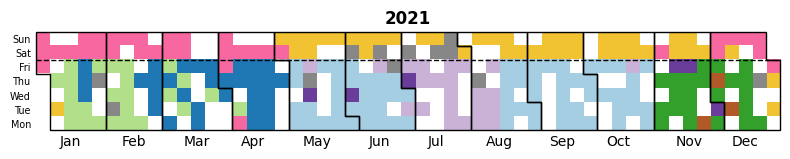

cluster_id_weekdays_share [3, 4, 68, 3, 32, 23, 6, 6, 25, 22]
cluster_id_weekend_share [0, 31, 0, 40, 0, 0, 6, 0, 0, 0]
111


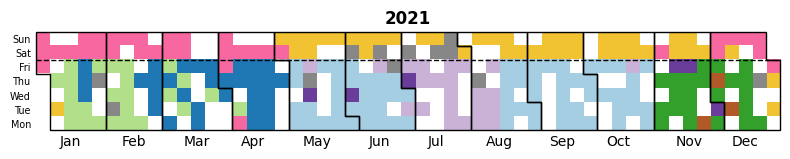

cluster_id_weekdays_share [53, 7, 3, 14, 28, 1, 1, 27, 31, 27]
cluster_id_weekend_share [0, 40, 17, 0, 0, 0, 20, 0, 0, 0]
111


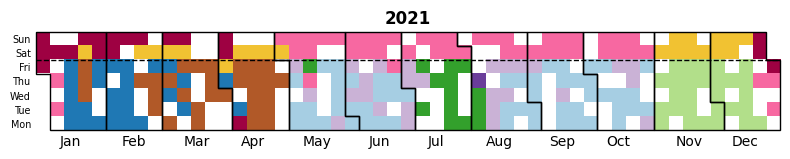

10 done
cluster_id_weekdays_share [0, 25, 2, 2, 9, 3, 1, 20, 3, 5, 122]
cluster_id_weekend_share [8, 0, 29, 0, 0, 0, 25, 0, 0, 0, 15]
111


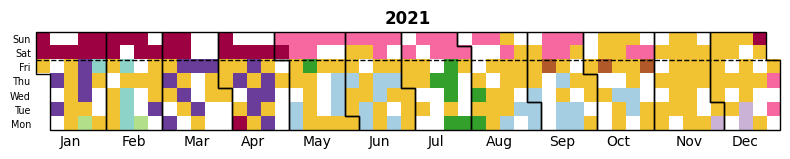

cluster_id_weekdays_share [0, 1, 9, 25, 1, 11, 4, 7, 134]
cluster_id_weekend_share [8, 29, 0, 0, 25, 0, 0, 0, 15]
111


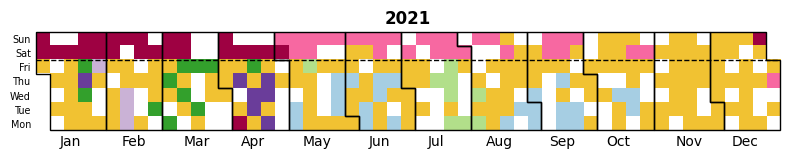

cluster_id_weekdays_share [1, 10, 25, 1, 9, 6, 140]
cluster_id_weekend_share [25, 0, 0, 23, 0, 0, 29]
111


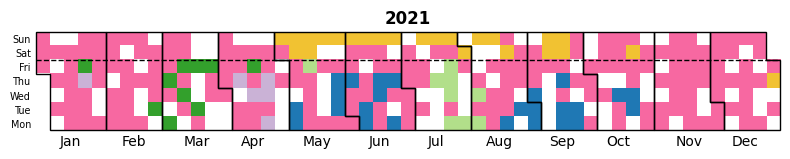

500 done


In [31]:
results = []

labels = None
n_clusters = [10]#[2,4,6,8,10,12]

for k in n_clusters:
    # KMeans
    km = KMeans(n_clusters=k, random_state=42)
    evaluate_clustering("KMeans", km, X_train, X_test, {"n_clusters": k})

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    evaluate_clustering("GMM", gmm, X_train, X_test, {"n_components": k})

    # Agglomerative
    agg = AgglomerativeClustering(n_clusters=k)
    evaluate_clustering("Agglomerative", agg, X_train, X_test, {"n_clusters": k})

    print(k,"done")

# DBSCAN separate, eps und min_samples vary
for eps in [500,600]:     #[400, 500, 600, 700, 800]:
    for ms in [2,4,6]:
        db = DBSCAN(eps=eps, min_samples=ms)
        evaluate_clustering("DBSCAN", db, X_train, X_test, {"eps": eps, "min_samples": ms})
    print (eps, "done")



In [54]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="accuracy MAE"))

           Method                          Params  Silhouette  DaviesBouldin  \
17  Agglomerative              {'n_clusters': 12}    0.163210       1.762242   
14  Agglomerative              {'n_clusters': 10}    0.166805       1.754096   
16            GMM            {'n_components': 12}    0.169686       1.627302   
15         KMeans              {'n_clusters': 12}    0.169686       1.627302   
11  Agglomerative               {'n_clusters': 8}    0.191241       1.368608   
13            GMM            {'n_components': 10}    0.194555       1.677786   
12         KMeans              {'n_clusters': 10}    0.194555       1.677786   
8   Agglomerative               {'n_clusters': 6}    0.225368       1.440012   
9          KMeans               {'n_clusters': 8}    0.219234       1.750012   
10            GMM             {'n_components': 8}    0.219234       1.750012   
22         DBSCAN  {'eps': 500, 'min_samples': 4}   -0.102801       2.259884   
21         DBSCAN  {'eps': 500, 'min_sam

In [23]:
n_clusters = 10
clusters = None

clustering_methods = [
    {"name": "KMeans", "model": KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")},
    {"name": "Agglomerative", "model": AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')},
    {"name": "DBSCAN", "model": DBSCAN(eps=500, min_samples=2)},
    {"name": "GMM", "model": GaussianMixture(n_components=n_clusters)}
]

for method in clustering_methods:
    print(f"\nRunning clustering with: {method['name']}")
    model = method["model"]

    if method["name"] == "GMM":
        cluster_labels = model.fit(X_train).predict(X_train)
    else:
        clusters = model.fit(X_train)
        cluster_labels = clusters.labels_
    SC_score = silhouette_score(X_train, cluster_labels)
    DB_score = davies_bouldin_score(X_train, cluster_labels)
    CH_score = calinski_harabasz_score(X_train, cluster_labels)
    total_score=SC_score-DB_score+np.log(CH_score+1)

    print(cluster_labels)
    print('Silhouette Score:', SC_score)
    print('Davies-Bouldin Score:', DB_score)
    print('Calinski-Harabasz Score:', CH_score)
    print("total SCore",total_score)



Running clustering with: KMeans
[1 7 9 8 9 2 7 9 7 2 2 6 6 1 9 7 7 9 7 7 4 8 7 7 7 2 1 6 7 7 1 7 8 7 3 2 9
 9 1 2 1 6 1 8 7 2 7 7 8 6 2 9 8 7 6 6 8 8 2 2 9 4 8 3 9 8 8 7 1 3 2 7 8 9
 9 7 7 3 6 7 6 7 7 9 7 1 7 9 2 7 6 9 8 9 9 7 1 6 6 7 6 7 9 0 3 9 5 7 7 7 6
 6 8 3 8 5 1 6 9 9 6 7 2 1 8 9 1 2 8 7 2 3 3 7 7 7 7 9 8 8 9 6 9 7 2 2 6 7
 7 4 3 7 6 7 3 6 1 6 1 7 6 1 9 0 8 7 8 3 7 3 7 8 6 5 2 9 6 6 2 9 7 9 9 9 2
 7 7 1 4 7 3 7 9 3 2 2 7 2 6 7 7 6 7 7 7 6 7 9 6 7 6 9 3 9 6 7 8 8 3 3 8 5
 2 7 8 8 9 9 2 3 7 4 3 7 1 7 1 8 2 6 9 9 7 2 1 7 7 8 6 2 7 6 6 9 6 7 7 7 8
 3 7 9 3 8 6 8 8 7 8]
Silhouette Score: 0.1831182887186136
Davies-Bouldin Score: 1.6680273638821574
Calinski-Harabasz Score: 57.43904653634981
total SCore 2.583075196328327

Running clustering with: Agglomerative
[6 0 1 7 1 7 0 1 0 7 7 4 3 6 1 9 0 1 0 0 5 8 0 9 0 7 6 4 0 0 6 0 8 0 2 1 1
 1 6 7 6 4 6 8 9 7 0 0 8 4 7 1 8 0 3 4 8 7 1 7 1 9 8 2 1 8 8 9 6 2 7 0 8 1
 1 9 9 2 4 0 4 0 0 1 0 6 9 1 7 0 4 1 8 1 1 0 6 4 4 0 4 0 1 0 2 1 3 0 9 0 4
 3 8

In [18]:
n_clusters = 10
clusters = None

clustering_methods = [
    {"name": "KMeans", "model": KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")},
    {"name": "Agglomerative", "model": AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')},
    {"name": "DBSCAN", "model": DBSCAN(eps=500, min_samples=2)},
    {"name": "GMM", "model": GaussianMixture(n_components=n_clusters)}
]

for method in clustering_methods:
    print(f"\nRunning clustering with: {method['name']}")
    model = method["model"]

    if method["name"] == "GMM":
        cluster_labels = model.fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans)
    else:
        clusters = model.fit(vectorized_day_dataset_no_nans)
        cluster_labels = clusters.labels_
    SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels)
    DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels)
    CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels)
    total_score=SC_score-DB_score+np.log(CH_score+1)

    print(cluster_labels)
    print('Silhouette Score:', SC_score)
    print('Davies-Bouldin Score:', DB_score)
    print('Calinski-Harabasz Score:', CH_score)
    print("total SCore",total_score)



Running clustering with: KMeans
[4 4 4 9 1 4 9 9 4 4 5 9 9 9 9 4 4 9 9 3 3 3 4 4 9 9 5 9 4 4 9 5 9 9 9 4 4
 9 9 9 5 9 4 4 9 9 3 3 4 4 3 3 3 9 4 4 3 3 9 3 9 4 4 3 9 9 9 3 4 4 3 3 3 3
 3 4 4 3 3 9 3 3 1 3 3 4 4 4 4 9 3 3 3 4 4 3 3 3 3 3 4 4 3 3 3 3 3 4 4 3 3
 3 3 3 4 1 2 2 2 2 2 5 1 2 2 8 5 0 5 1 2 2 5 1 2 2 2 2 2 5 1 2 2 8 2 8 5 1
 2 2 8 8 8 5 1 2 8 2 2 0 5 1 2 2 8 2 5 4 1 8 0 2 8 0 5 7 0 8 0 5 5 0 0 0 0
 0 5 5 0 0 0 0 0 5 5 0 0 5 1 0 0 0 7 1 1 0 0 0 2 0 5 1 2 2 2 2 8 1 1 2 2 2
 2 8 1 1 2 2 2 2 8 5 2 1 1 2 2 8 2 2 1 1 2 2 2 2 1 1 2 2 2 2 2 7 2 2 2 1 1
 2 2 2 2 8 5 1 2 2 2 8 0 1 1 8 2 2 2 1 1 6 6 6 6 4 1 6 6 6 6 1 1 6 6 6 6 6
 1 1 6 6 6 6 6 1 4 6 6 6 6 6 1 4 6 6 6 9 1 1 6 6 6 6 6 1 1 6 6 6 5 4 4 4 5
 1 1 1 4]
Silhouette Score: 0.1888295110481911
Davies-Bouldin Score: 1.7434244441047695
Calinski-Harabasz Score: 81.05449965897482
total SCore 2.8527887234264764

Running clustering with: Agglomerative
[8 1 1 6 0 1 0 0 1 1 4 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 4 0 1 1 0 4 0 0 0 1 1
 0 0 0 0 0 1 1 

Internal evaluation

In [13]:
# Calculate the Silhouette Score
SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels)
# Silhouette Score measures the quality of clusters, higher values indicate better separation.

# Calculate the Davies-Bouldin Score
DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels)
# Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster, lower values indicate better separation.

# Calculate the Calinski-Harabasz Score
CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels)
# Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance, higher values indicate better separation.

# Print the computed cluster quality scores
print('Silhouette Score:', SC_score)
print('Davies-Bouldin Score:', DB_score)
print('Calinski-Harabasz Score:', CH_score)

Silhouette Score: 0.21506167345844876
Davies-Bouldin Score: 1.4150683146774594
Calinski-Harabasz Score: 78.95519615286356


not used at the moment

In [ ]:
def evaluate_clustering(method, model, X_train, X_test, params):
    labels = None
    if method == "GMM":
        model.fit(X_train)
        labels = model.predict(X_train)
    else:
        labels = model.fit_predict(X_train)

    if len(np.unique(labels)) > 1 and np.any(labels != -1):
        sil = silhouette_score(X_train, labels)
        db  = davies_bouldin_score(X_train, labels)
        ch  = calinski_harabasz_score(X_train, labels)
    else:
        sil, db, ch = np.nan, np.nan, np.nan

    # Cluster-Zentren bestimmen
    if method == "GMM":
        unique = np.unique(labels)
        centroids = np.vstack([X_train[labels == u].mean(axis=0) for u in unique])
        test_labels = model.predict(X_test)
    elif method == "DBSCAN":
        unique = np.unique(labels)
        centroids = {u: X_train[labels == u].mean(axis=0) for u in unique if u != -1}
        global_mean = X_train.mean(axis=0)
        preds = []
        for x in X_test:
            if len(centroids) == 0:
                preds.append(global_mean)
            else:
                dists = {l: np.linalg.norm(x - c) for l, c in centroids.items()}
                nearest = min(dists, key=dists.get)
                preds.append(centroids[nearest])
        preds = np.vstack(preds)
    else:
        unique = np.unique(labels)
        centroids = np.vstack([X_train[labels == u].mean(axis=0) for u in unique])
        preds = []
        for x in X_test:
            dists = np.linalg.norm(centroids - x, axis=1)
            nearest = np.argmin(dists)
            preds.append(centroids[nearest])
        preds = np.vstack(preds)

    if method != "DBSCAN":
        preds = np.vstack([centroids[list(unique).index(l)] for l in test_labels]) if method == "GMM" else preds

    # external metrics
    rmse = math.sqrt(mean_squared_error(X_test, preds))
    mae  = mean_absolute_error(X_test, preds)


    results.append({
        "Method": method,
        "Params": params,
        "Silhouette": sil,
        "DaviesBouldin": db,
        "CalinskiHarabasz": ch,
        "RMSE_Test": rmse,
        "MAE_Test": mae
    })
